# EDA & Model implementation 

In [7]:

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score,max_error
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [4]:

#import data from csv

results=pd.read_csv('./final.csv',sep=',', error_bad_lines=False, index_col=False)
#removing unique and unwanted columns for eda/ml purposes

results.drop(['university', 'page_no',  'exam_held_on',
        'result_date','c6','c6_tw', 'c6_or'],1,inplace =True)

# view columns of data set 
print(results.columns)

                                                                                                                                                                                                          
#to view all  columns

pd.set_option('display.max_columns', None)




#to remove characters from string of numbers

for x in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
           'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
           'c4_or', 'c4_in', 'c5_tw', 'c5_or','sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi','college_code']:
    
    #print(x)                                              

    results[x] = results[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 


    if x == 'college_code':
        results[x].replace('(?<![\w\d])NAME(?![\w\d])(:)','',regex=True, inplace = True)
        
    
    if x != 'college_code':
        results[x].replace('[^0-9.]','',regex=True, inplace = True)
        results[x]=pd.to_numeric(results[x])
        
# creating integer based columns list and converting string based integer to integer
int_col = ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
       'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
       'c4_or', 'c4_in', 'c5_tw', 'sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6','c5_or','sem_7', 'sem_8', 'cgpi']
departments= results.department.unique()

# to find the null replace them with the zeros and drop sem marks with zeros
results.fillna(0,inplace=True)
for x in ['sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi']:
        results = results[(results[x]!=0) & (results['c1_or']<50)]
        
        
        

# creating new data frame of passed students 

passed = results[results['result']=='P']

colleges = results['college_code'].unique()

# filling the null values with respective colleges mean 

# for i in ['c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th', 'c2_tw',
#        'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th', 'c4_tw',
#        'c4_or', 'c4_in', 'c5_tw','c5_or',]:
#     for x in colleges:
#         #print(passed[i].loc[passed['college_code']==x].mean(),str(x),i)
#         passed.fillna((0),inplace=True)


# creating new dataset for diploma students 

diploma = passed[passed['sem_1']=="['Diploma']"]

regular = passed[passed['sem_1']!="['Diploma']"]
#to remove characters from string of numbers

for x in ['sem_1','sem_2']:
    regular[x].replace('[^0-9.]','',regex=True, inplace = True)
    regular[x] = regular[x].apply(lambda i: i.replace('[','').replace(']','').replace("'","").replace("(","").replace(")","")) 
    regular[x]=pd.to_numeric(regular[x])
     

regular.to_csv("regular.csv")
diploma.to_csv("diploma.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14,33,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['department', 'college_code', 'seat_no', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th',
       'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th',
       'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c5_or', 'sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

In [9]:
regular.columns

Index(['department', 'college_code', 'seat_no', 'elective', 'result', 'c1',
       'c2', 'c3', 'c4', 'c5', 'c1_th', 'c1_tw', 'c1_or', 'c1_in', 'c2_th',
       'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in', 'c4_th',
       'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c5_or', 'sem_1', 'sem_2', 'sem_3',
       'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],
      dtype='object')

# Model building

In [49]:
data =  regular.filter(['department', 'college_code',
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'], axis=1)

In [50]:
final = pd.get_dummies(data,columns=['department', 'college_code'],drop_first=True)

In [101]:
def run_model(new):
    
    X = final.drop('sem_8',1)
    y = final['sem_8']
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=13)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train) #training the algorithm
    y_pred = regressor.predict(X_test)
    print('maximum Error : ' +str( max_error(y_test,y_pred)))
    df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    df1 = df.head(90)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R Squared :', r2_score(y_test, y_pred))
    print(df1.head(3))
    df1.plot(kind='bar',figsize=(10,8))

    plt.show()

maximum Error : 2.027119330742745
Mean Absolute Error: 0.3544560464313688
Mean Squared Error: 0.2015320684593144
Root Mean Squared Error: 0.4489232322561558
R Squared : 0.6357168101286013
       Actual  Predicted
12296    8.04   7.635999
696      7.88   7.418465
48121    8.16   8.607439


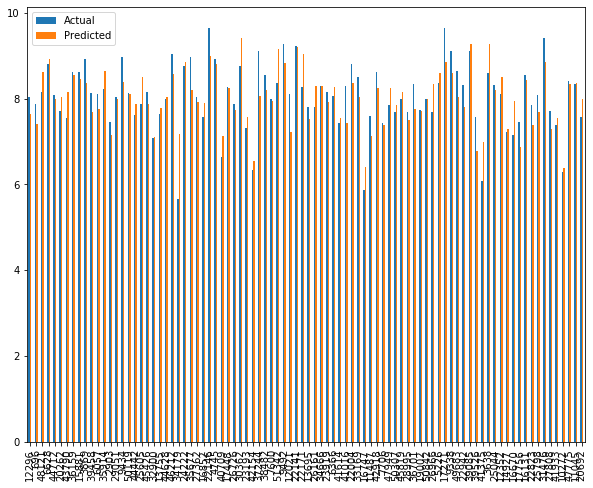

In [102]:
run_model(final)

## Test with only sem 1 marks

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


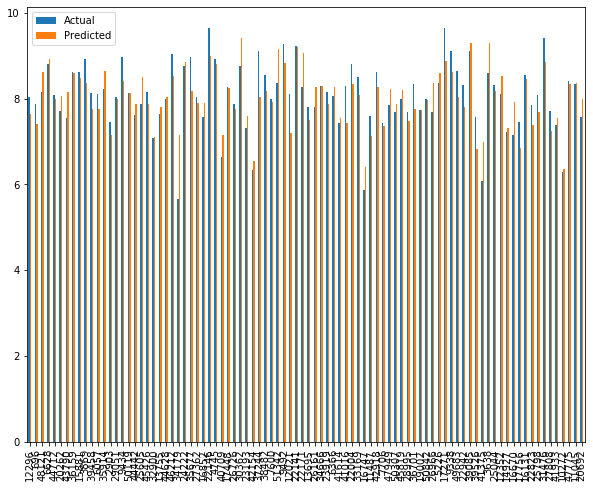

In [52]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in ['sem_2',
 'sem_3', 'sem_4', 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


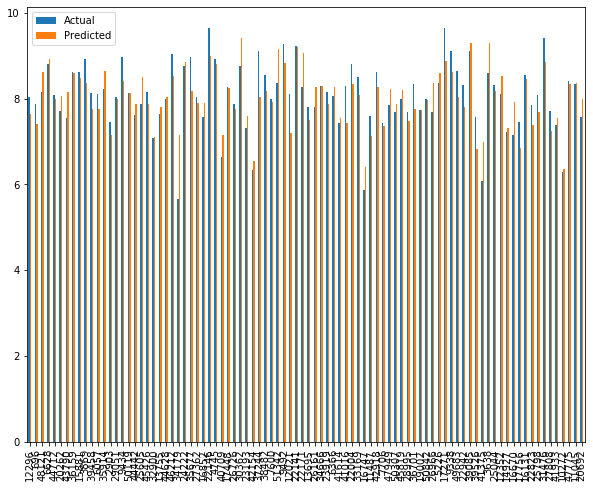

In [53]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    

regular.columns

# finding and replacing values with 3 conditions on columns 

for x in ['sem_3', 'sem_4', 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

 ## test with sem 1,2,3  

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


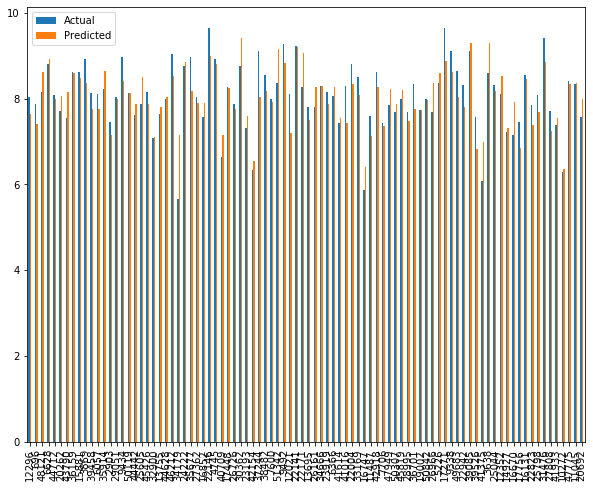

In [54]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_4', 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


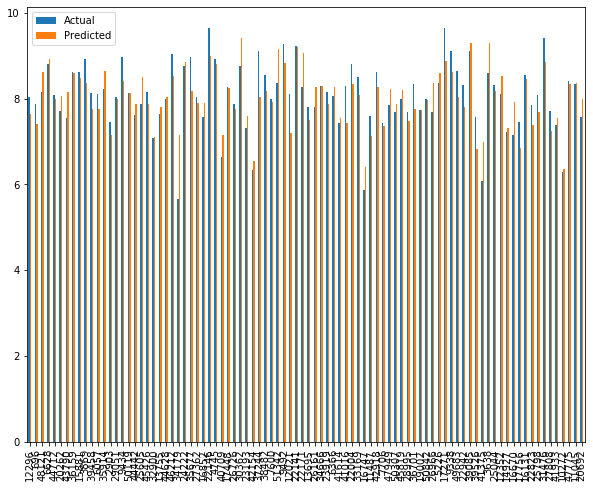

In [55]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_5', 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4,5

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


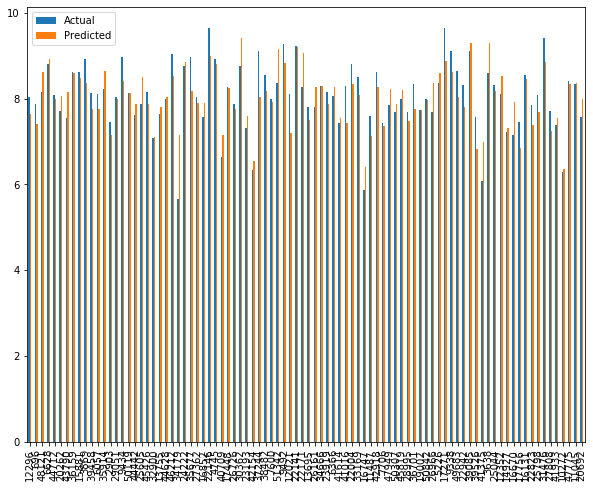

In [56]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [ 'sem_6',
 'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

## test with sem 1,2,3,4,5,6

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


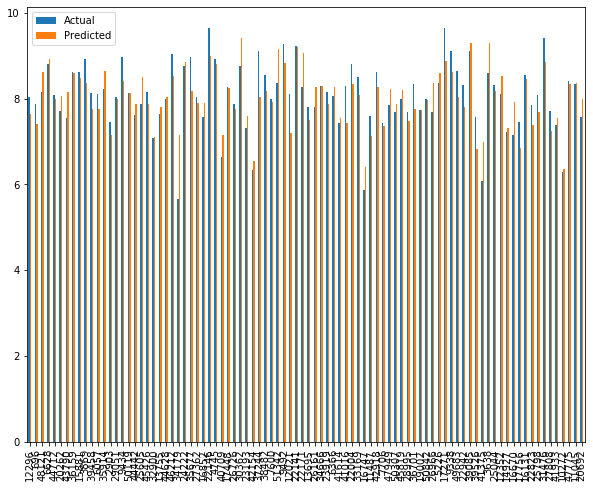

In [57]:
X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

for x in [  'sem_7']:
    for y in colleges:
        
        for z in departments:
            difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
            X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

maximum Error : 1.4880366050066467
Mean Absolute Error: 0.3581936761422147
Mean Squared Error: 0.1982932085084126
Root Mean Squared Error: 0.44530125590257724
R Squared : 0.6564885557794327


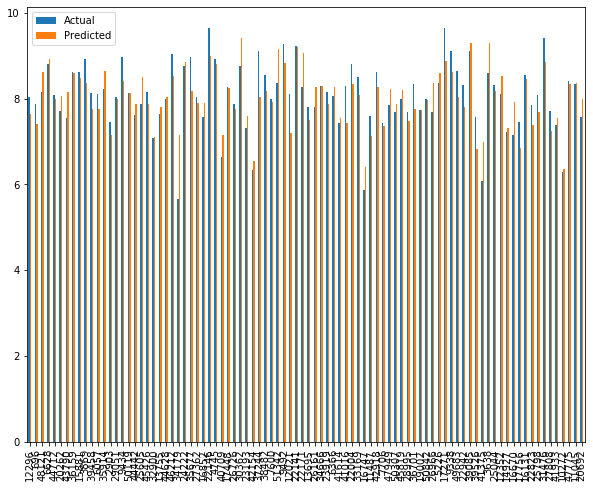

In [58]:

X = data.drop('sem_8',1)
y = data['sem_8']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.01,random_state=13)
regressor = LinearRegression()
    



# finding and replacing values with 3 conditions on columns 

# for x in [ 'sem_4', 'sem_5', 'sem_6',
#  'sem_7']:
#     for y in colleges:
        
#         for z in departments:
#             difference  = X_test[((X_test['college_code']==y) & (X_test['department']==z))]['sem_1']-X_train[(X_train['college_code']==y) & (X_train['department']==z)]['sem_1'].mean()
#             X_test[((X_test['college_code']==y) & (X_test['department']==z))][x] = (X_train[(X_train['college_code']==y) & (X_train['department']==z)][x])+difference


X_train = X_train.append(X_test,ignore_index=True)




#X_test = pd.get_dummies(X_test,columns=['department', 'college_code'],drop_first=True)
X_train = pd.get_dummies(X_train,columns=['department', 'college_code'],drop_first=True)

X_test = X_train[28006:]

X_train[28006:].index

X_train = X_train[:28006]



regressor.fit(X_train, y_train) #training the algorithm
y_pred = regressor.predict(X_test)
print('maximum Error : ' +str( max_error(y_test,y_pred)))
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(90)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared :', r2_score(y_test, y_pred))

df1.plot(kind='bar',figsize=(10,8))

plt.show()

In [ ]:
regular.describe()

In [ ]:
results.groupby(['department'])['c1_tw','c2_tw','c3_tw','c4_tw'].max()

In [ ]:
results.groupby(['department'])['c1_or','c2_or','c3_or','c4_or'].max()

In [ ]:
results.groupby(['department'])['c1_in','c2_in','c3_in','c4_in'].max()

In [ ]:
results.groupby(['department'])['c1_th','c1_tw',
                         'c1_or', 'c1_in', 'c2_th', 'c2_tw', 'c2_or',
                         'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
                        'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw',
                        'sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5', 
                        'sem_6', 'sem_7', 'sem_8'].max()

In [ ]:
for x in ['sem_1','sem_2', 'sem_3', 'sem_4', 'sem_5','sem_6', 'sem_7', 'sem_8']:
    re

In [ ]:
#plotting scatter plot of students in colleges
# y-axis values 


# plotting points as a scatter plot 
for col in colleges:
    for stud in range(len(regular[regular['college_code']==col])):
        #print(stud)
        x = ['sem 1', 'sem 2','sem 3', 'sem 4', 'sem 5', 'sem 6', 'sem 7', 'sem 8','cgpi']
        y = [regular['sem_1'][stud],regular['sem_2'][stud],regular['sem_3'][stud]
             ,regular['sem_4'][stud],regular['sem_5'][stud],regular['sem_6'][stud]
             ,regular['sem_7'][stud],regular['sem_8'][stud],regular['cgpi'][stud] ]
        plt.scatter(x, y) 
        plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
        # x-axis label 
        plt.xlabel('Sem') 
        # frequency label 
        plt.ylabel('Pointers') 
        # plot title 
        plt.title('Semwise result of college code {0}'.format(col)) 
        # showing legend 


        # function to show the plot 
        plt.show()

In [ ]:
#Creating a function to plot semwise of entire result wrt indiviual colleges

def plot_sem(y,i):
    x = ['1', '2', '3',
       '4', '5', '6', '7', '8', 'CGPI']
    y = [y[ 'sem_1'],y[ 'sem_2'],y[ 'sem_3'],y[
       'sem_4'],y[ 'sem_5'],y[ 'sem_6'],y[ 'sem_7'],y[ 'sem_8'],y[ 'cgpi' ]]
    
    plt.plot(x,y,label=i,marker='.') 
    plt.yticks([0,1,2,3,4,5,6,7,8,9,10])
   

In [ ]:
#Creating a function to plot termworkwise of entire result wrt indiviual colleges
def plot_tw(y,i):
    x = ['sem 1', 'sem 2', 'sem 3',
       'sem 4', 'sem 5', 'sem 6', 'sem 7', 'sem 8', 'cgpi']
    y = [y[ 'sem_1'],y[ 'sem_2'],y[ 'sem_3'],y[
       'sem_4'],y[ 'sem_5'],y[ 'sem_6'],y[ 'sem_7'],y[ 'sem_8'],y[ 'cgpi' ]]
    
    plt.scatter(x,y,label=i) 
    plt.yticks([0,50])
   

In [ ]:
#Creating a function to plot internal of entire result wrt indiviual colleges

def plot_internals(y,j):
    x = ['c1 tw', 'c1 or', 'c1 in','c2 tw',
       'c2 or', 'c2 in', 'c3 tw', 'c3 or', 'c3 in', 'c4 tw',
       'c4 or', 'c4 in', 'c5 tw', 'c6 tw', 'c6 or']
    y = [y[ 'c1_tw'],y[ 'c1_or'],y[ 'c1_in'],y[ 'c2_tw'],y['c2_or'],y[ 'c2_in'],y[ 'c3_tw'],y[ 'c3_or'],y[ 'c3_in'],y[ 'c4_tw'],y[
       'c4_or'],y[ 'c4_in'],y[ 'c5_tw'],y[ 'c6_tw'],y[ 'c6_or']]
    
    plt.scatter(x,y,label='college code '+j) 
    plt.yticks([0,8,10,25])
    plt.legend(fontsize=12) 
   

In [ ]:

for j in colleges:
    #coll = results[results['college_code']=='124'].mean()
    plot_sem(regular.mean(),'Mumbai University Mean')
    plot_sem(regular[regular['college_code']==j].mean(),'college '+j)
     # x-axis label 
    plt.xlabel('Sem') 
    # frequency label 
    plt.ylabel('Pointers') 
    # plot title 
    plt.title('Average Semwise result of college code {0}'.format(j)) 
    
    plt.legend(fontsize=12)    

 # showing legend 
 # function to show the plot 
    plt.show()


In [ ]:
for j in colleges:
    #coll = results[results['college_code']=='124'].mean()
    plot_sem(regular.mean(),'Mumbai University Mean')
 
    departments = regular[regular['college_code']==j]['department'].unique()
    print(departments)
    departments.sort()
    print( '  '+departments)
    for dep in departments:
        plot_sem(regular[(regular['college_code']==j) & (regular['department']==dep)].mean(),dep)
     # x-axis label 
    plt.xlabel('Sem') 
    # frequency label 
    plt.ylabel('Pointers') 
    # plot title 
    plt.title('Departmentwise result of college {0}'.format(j)) 
    
    plt.legend(fontsize=12,loc='center left', bbox_to_anchor=(1, 0.5))    
    plt.savefig('Departmentwise '+j+'.png',dpi=300,transparent=True,bbox_inches='tight',orientation='landscape',)
 # showing legend 
 # function to show the plot 
    plt.show()


In [ ]:
regular.reset_index(inplace=True)
for x in range(regular.shape[0]):
    if  regular['cgpi'][x]>10:
        #print(regular[x])
        regular = regular.drop(x,axis=0)
    

In [ ]:
regular = regular.filter(['department', 'college_code', 'elective', 'result',
       'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'], axis=1)

In [ ]:
for x in regular.iterrows():
    if x[1]['c1_or']==191:
        print(x)
    if x[1]['c3_tw']==60:
        print(x)

In [ ]:
Q1 = new.quantile(0.25)
Q3 = new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(new < (Q1 - 1.5 * (IQR))) |(new> (Q3 + 1.5 * (IQR)))

In [ ]:
regular.dtypes

In [ ]:

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:
new = regular.filter(['c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],axis=1)

In [ ]:
outliers_iqr(regular.filter(['c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or', 'sem_1',
       'sem_2', 'sem_3', 'sem_4', 'sem_5', 'sem_6', 'sem_7', 'sem_8', 'cgpi'],axis=1))

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new))
print(z)

In [ ]:
nw = regular[(z < 3).all(axis=1)]

In [ ]:
import seaborn as sns
for x in ['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c1_th', 'c1_tw', 'c1_or', 'c1_in',
       'c2_th', 'c2_tw', 'c2_or', 'c2_in', 'c3_th', 'c3_tw', 'c3_or', 'c3_in',
       'c4_th', 'c4_tw', 'c4_or', 'c4_in', 'c5_tw', 'c6_tw', 'c6_or']:
        sns.boxplot(x=regular[x])

In [ ]:
regular.describe()

In [ ]:
for y in ['sem_1','sem_2']:
        regular[y].replace('[^0-9.]','',regex=True, inplace = True)
        regular[y]= pd.to_numeric(regular[y])

In [ ]:
regular.columns

In [ ]:
regular = passed[(passed['sem_1']).notnull()]


In [ ]:
#converting diploma students sem 1 & 2 into marks 
regular.reset_index(inplace=True)
regular['Diploma']= 'False'
for x in range (regular.shape[0]):
    
    if regular['sem_1'][x] == 'Diploma':
        regular['Diploma'][x] = 'True'
        new =regular['cgpi'][x]
        regular['sem_1'][x]=new
        regular['sem_2'][x]=new
for y in ['sem_1','sem_2']:
        regular[y].replace('[^0-9.]','',regex=True, inplace = True)
        regular[y]= pd.to_numeric(regular[y])

In [ ]:
int_col